In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [283]:
train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [284]:
train_original=train.copy()
test_original=test.copy()

# Understanding Data

In [285]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [286]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

#Loan Status to be predicted

In [287]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [288]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [289]:
train.shape,test.shape

((614, 13), (367, 12))

# Univariate Analysis

In [290]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [291]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

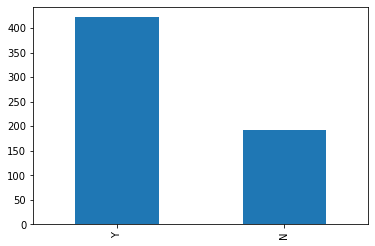

In [292]:
train['Loan_Status'].value_counts().plot.bar()

In [293]:
import plotly.express as px

# Categorical Variable Visualization

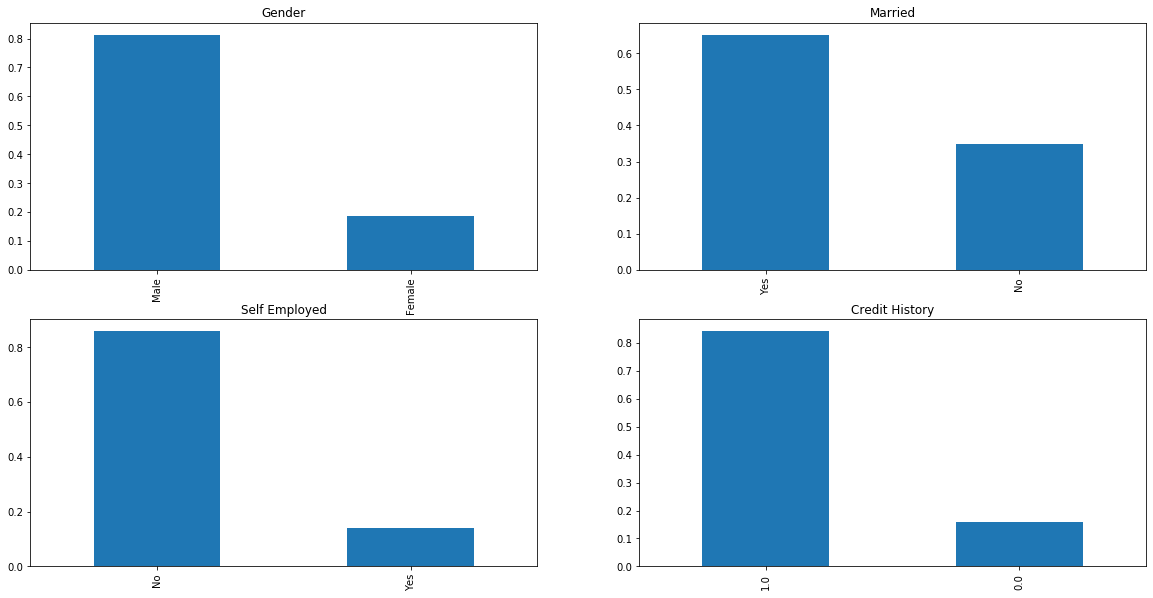

In [294]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self Employed')
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit History')
plt.show()

# Ordinal Variable Visualization

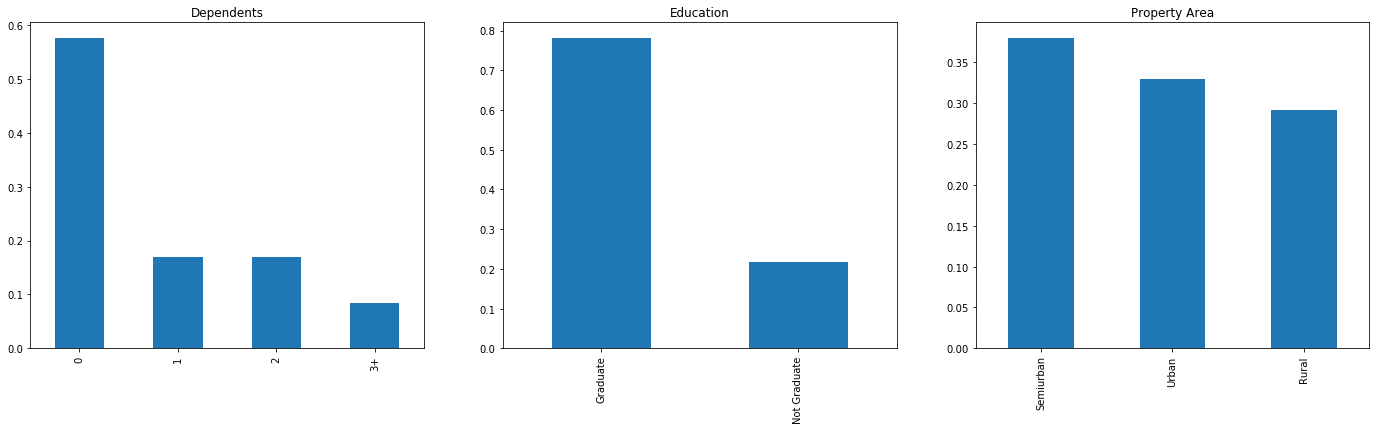

In [295]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')
plt.show()

Most applicants don't have dependents
Approx 80% of applicants are graduate
Majority applicants are from semi urban area

# Numerical Variable Visualization

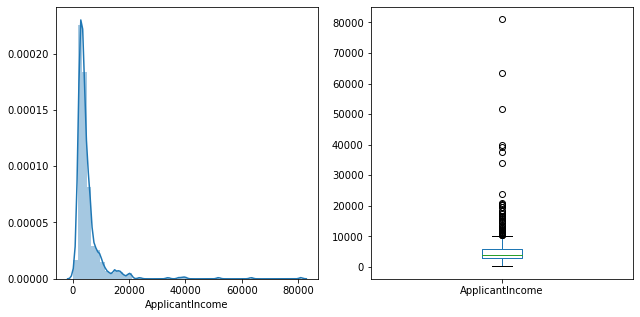

In [296]:
plt.figure(1)
plt.subplot(131)
sns.distplot(train['ApplicantIncome'])
plt.subplot(132)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [297]:
#Outliers in boxplot

Text(0.5, 0.98, '')

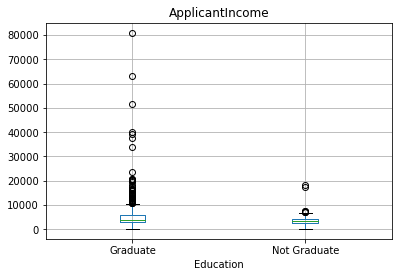

In [298]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")


In [299]:
#With CoApplicant income

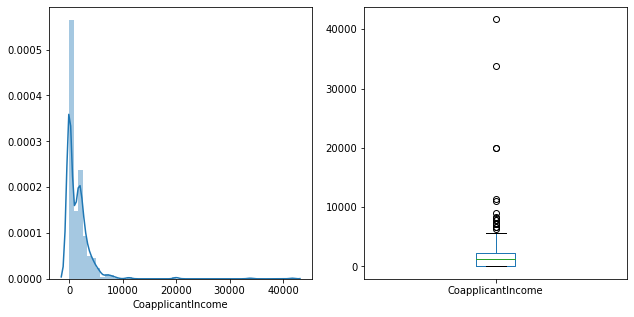

In [300]:
plt.figure(1)
plt.subplot(131)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(132)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [301]:
#Not normally distributed and outliers present

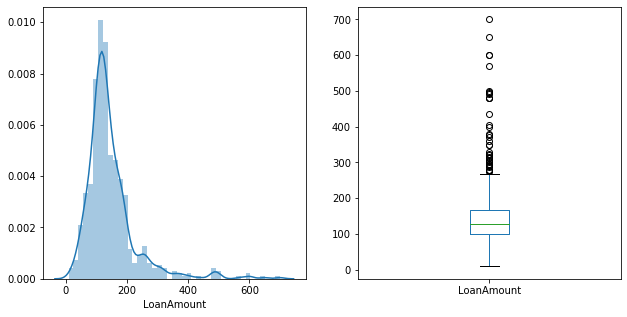

In [302]:
plt.figure(1)
plt.subplot(131)
df=train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(132)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

# Bivariate Analysis

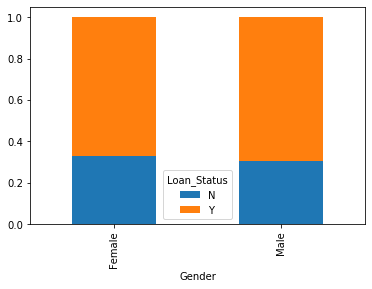

In [303]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

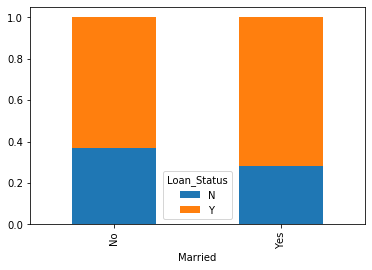

In [304]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

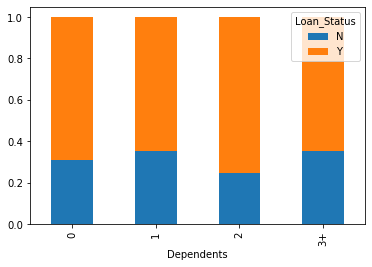

In [305]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

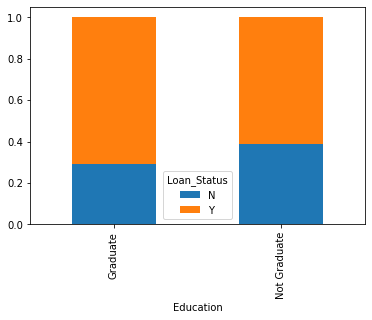

In [306]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

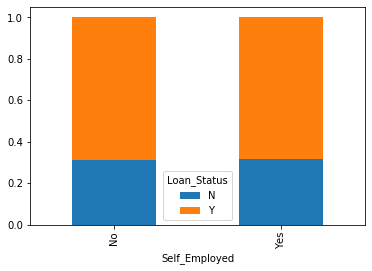

In [307]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

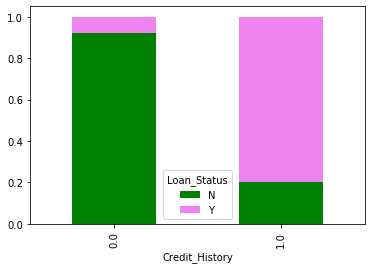

In [308]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['green','violet'])

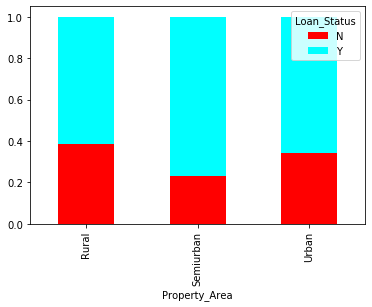

In [309]:
Property=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property.div(Property.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['red','cyan'])

In [310]:
#Credit history with 1 are more likely to get their loan approved

# Numerical Bivariate analysis

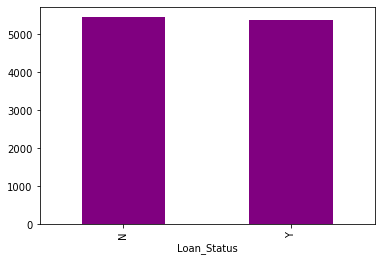

In [311]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(color='purple')

In [312]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very High']

In [313]:
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

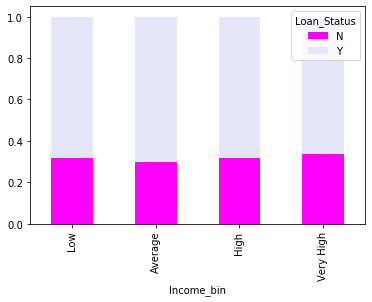

In [314]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,colors=['fuchsia','lavender'])

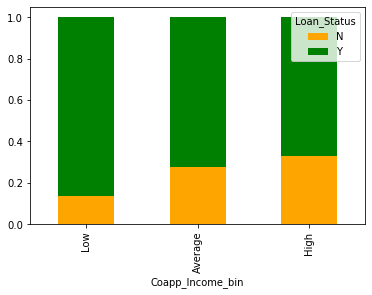

In [315]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High']
train['Coapp_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapp_Income_bin=pd.crosstab(train['Coapp_Income_bin'],train['Loan_Status'])
Coapp_Income_bin.div(Coapp_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,colors=['orange','green'])

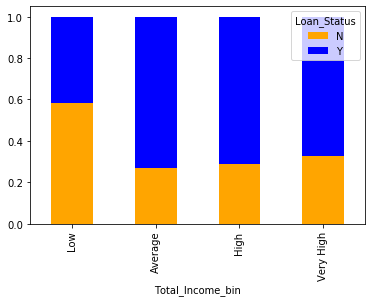

In [316]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,colors=['orange','blue'])

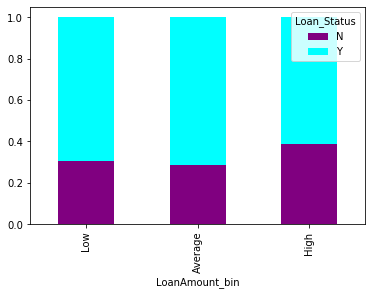

In [317]:
bins=[0,100,200,700] 
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,colors=['purple','cyan'])

In [318]:
train=train.drop(['Income_bin','Coapp_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

In [319]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

In [320]:
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

In [321]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


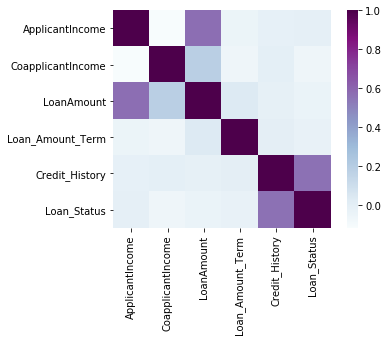

In [322]:
sns.heatmap(train.corr(),square=True,cmap="BuPu")

#High correlation
1.Loan amount-Applicant income-0.57
2.Credit History-Loan Status-0.56

# Missing Value and Outlier Treatment

In [323]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

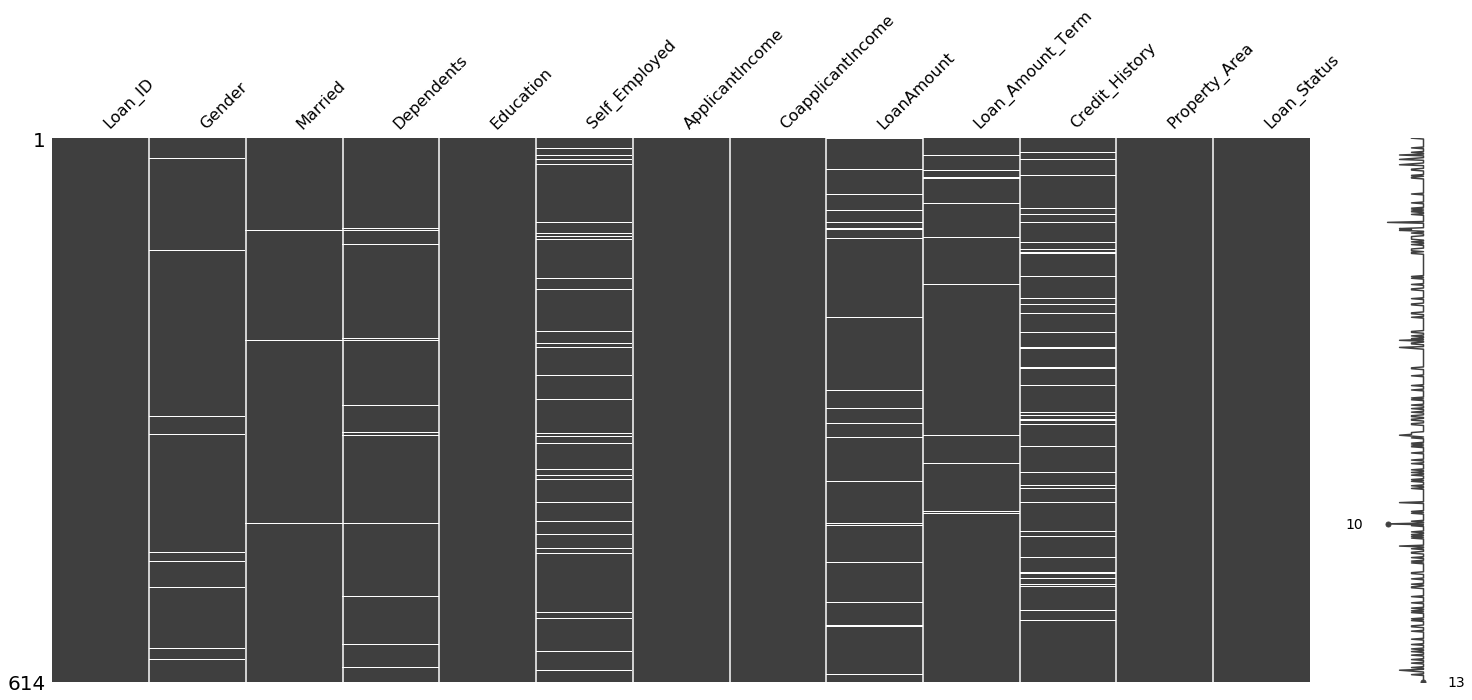

In [324]:
import missingno as msno
msno.matrix(train)

Numerical values imputed by mean,median
Categorical by mode

In [325]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [326]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

360 repeating at most so replace with mode

In [327]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

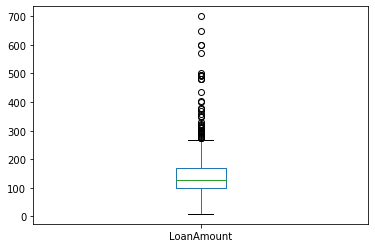

In [328]:
train['LoanAmount'].plot(kind='box')

High number of outliers so mean not feasible for imputation

In [329]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [330]:
print(train['LoanAmount'].median())
print(train['LoanAmount'].mean())

128.0
145.75244299674267


In [331]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [332]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

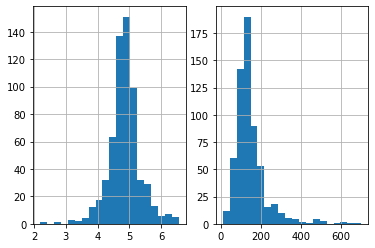

In [333]:
train['LoanAmt_log']=np.log(train['LoanAmount'])
test['LoanAmt_log']=np.log(test['LoanAmount'])
plt.figure(1)
plt.subplot(121)
train['LoanAmt_log'].hist(bins=20)
plt.subplot(122)
train['LoanAmount'].hist(bins=20)
plt.show()

After log tranformation, the plot approaches normal distribution

Metrics:
    Accuracy-(tp+tn)/(tp+tn+fp+fn)
    Precision-tp/(tp+fp)
    Recall- tp/(tp+fn)
    Specificity- tn/(tn+fp)
    ROC Curve- model's perfromance between sensitivity and specificity
    AUC ROC- Area under the curve Receiver operating characteristics 
    Greater AUC better model
    

# Model Building

In [334]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [335]:
X=train.drop('Loan_Status',1)
Y=train.Loan_Status

In [336]:
#Converting categorical variables to numerical features

In [337]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [338]:
from sklearn.model_selection import train_test_split

In [339]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [340]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((429, 21), (185, 21), (429,), (185,))

In [341]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [342]:
logreg=LogisticRegression()

In [343]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [344]:
pred_log=logreg.predict(x_test)

In [345]:
cm_test = confusion_matrix(pred_log, y_test)

In [346]:
y_pred_train = logreg.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [347]:
accuracy_score(y_test,pred_log)

0.8054054054054054

In [348]:
pred_test=logreg.predict(test)

In [349]:
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for Logistic Regression = 0.7832167832167832
Accuracy for test set for Logistic Regression = 0.8054054054054054


In [350]:
cm_test

array([[ 29,  10],
       [ 26, 120]], dtype=int64)

In [351]:
from sklearn.metrics import f1_score,precision_score,recall_score

In [352]:
tn, fp, fn, tp=confusion_matrix(logreg.predict(x_test),y_test).ravel()
print(confusion_matrix(y_test,logreg.predict(x_test)))
recall_scr_log=tp/(tp+fp)
precision_scr_log=tp/(tp+fn)
F1_score_log=(2*precision_scr_log*recall_scr_log)/(precision_scr_log+recall_scr_log)
print("Precision is ",precision_scr_log)
print("Recall is ",recall_scr_log)
print("F1 score is ",F1_score_log)

[[ 29  26]
 [ 10 120]]
Precision is  0.821917808219178
Recall is  0.9230769230769231
F1 score is  0.8695652173913043


In [353]:
#K-Fold Validation - to check how robust is our model

In [354]:
from sklearn.model_selection import StratifiedKFold

In [355]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index ,test_index in kf.split(X,Y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=Y.iloc[train_index],Y.iloc[test_index]
    logreg=LogisticRegression(random_state=1)
    logreg.fit(x_train,y_train)
    pred_test=logreg.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy score ',score)
    i+=1
    pred_test=logreg.predict(test)
    pred=logreg.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score  0.7886178861788617

2 of kfold 5
accuracy score  0.8211382113821138

3 of kfold 5
accuracy score  0.7886178861788617

4 of kfold 5
accuracy score  0.7886178861788617

5 of kfold 5
accuracy score  0.7622950819672131


In [356]:
from sklearn import metrics

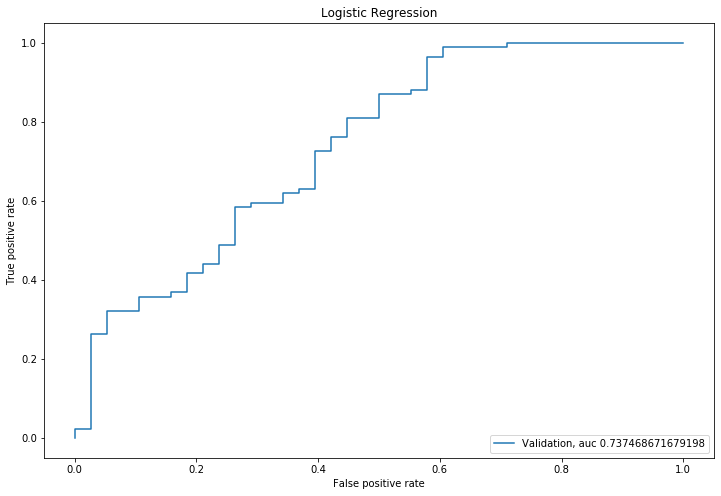

In [364]:
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation, auc "+str(auc))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc=4)
plt.title("Logistic Regression")
plt.show()

# Decision Tree

In [371]:
from sklearn import tree
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index ,test_index in kf.split(X,Y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=Y.iloc[train_index],Y.iloc[test_index]
    dt=tree.DecisionTreeClassifier(random_state=1)
    dt.fit(x_train,y_train)
    pred_test=dt.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy score ',score)
    i+=1
    pred_test=dt.predict(test)
    


1 of kfold 5
accuracy score  0.8861788617886179

2 of kfold 5
accuracy score  0.9349593495934959

3 of kfold 5
accuracy score  0.9186991869918699

4 of kfold 5
accuracy score  0.926829268292683

5 of kfold 5
accuracy score  0.9098360655737705


In [372]:
#Auc of 0.77

In [373]:
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_log=dt.predict(x_test)
cm_test = confusion_matrix(pred_log, y_test)
y_pred_train = dt.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)
pred_test=logreg.predict(test)
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
tn, fp, fn, tp=confusion_matrix(dt.predict(x_test),y_test).ravel()
print(confusion_matrix(y_test,dt.predict(x_test)))
recall_scr_log=tp/(tp+fp)
precision_scr_log=tp/(tp+fn)
F1_score_log=(2*precision_scr_log*recall_scr_log)/(precision_scr_log+recall_scr_log)
print("Precision is ",precision_scr_log)
print("Recall is ",recall_scr_log)
print("F1 score is ",F1_score_log)

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7135135135135136
[[ 31  24]
 [ 29 101]]
Precision is  0.808
Recall is  0.7769230769230769
F1 score is  0.792156862745098


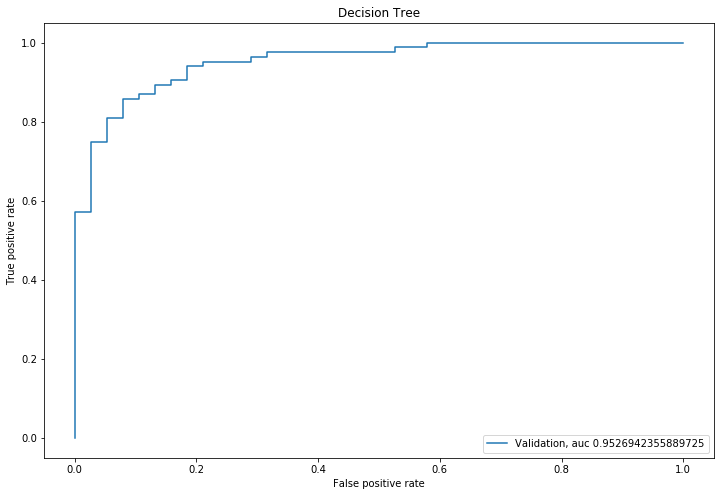

In [374]:
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation, auc "+str(auc))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc=4)
plt.title("Decision Tree")
plt.show()

# Random Forest

In [368]:
from sklearn.ensemble import RandomForestClassifier
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index ,test_index in kf.split(X,Y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=Y.iloc[train_index],Y.iloc[test_index]
    rfc=RandomForestClassifier(random_state=1,max_depth=10)
    rfc.fit(x_train,y_train)
    pred_test=rfc.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy score ',score)
    i+=1
    pred_test=rfc.predict(test)
    pred=rfc.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score  0.9105691056910569

2 of kfold 5
accuracy score  0.9349593495934959

3 of kfold 5
accuracy score  0.926829268292683

4 of kfold 5
accuracy score  0.9024390243902439

5 of kfold 5
accuracy score  0.8770491803278688


In [369]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_log=rfc.predict(x_test)
cm_test = confusion_matrix(pred_log, y_test)
y_pred_train = rfc.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)
pred_test=logreg.predict(test)
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
tn, fp, fn, tp=confusion_matrix(rfc.predict(x_test),y_test).ravel()
print(confusion_matrix(y_test,rfc.predict(x_test)))
recall_scr_log=tp/(tp+fp)
precision_scr_log=tp/(tp+fn)
F1_score_log=(2*precision_scr_log*recall_scr_log)/(precision_scr_log+recall_scr_log)
print("Precision is ",precision_scr_log)
print("Recall is ",recall_scr_log)
print("F1 score is ",F1_score_log)

Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.8
[[ 33  22]
 [ 15 115]]
Precision is  0.8394160583941606
Recall is  0.8846153846153846
F1 score is  0.8614232209737828


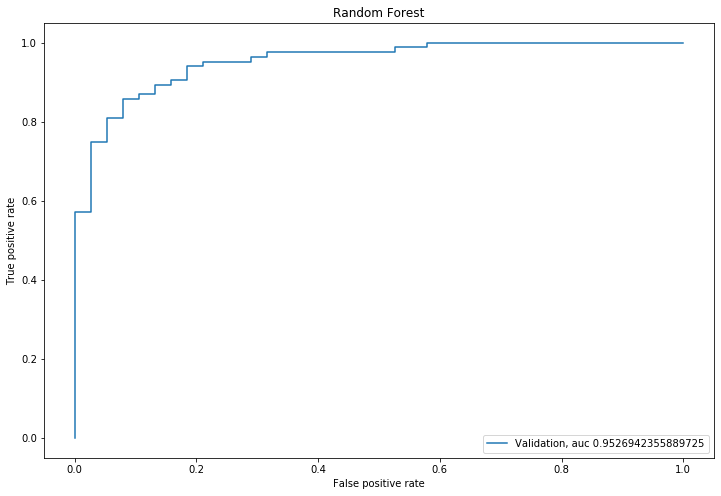

In [370]:
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation, auc "+str(auc))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc=4)
plt.title("Random Forest")
plt.show()

# XGBoost

In [378]:
from xgboost import XGBClassifier
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index ,test_index in kf.split(X,Y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=Y.iloc[train_index],Y.iloc[test_index]
    xgb=XGBClassifier(n_estimators=50,max_depth=4)
    xgb.fit(x_train,y_train)
    pred_test=xgb.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy score ',score)
    i+=1
    pred_test=xgb.predict(test)
    pred=xgb.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score  0.9105691056910569

2 of kfold 5
accuracy score  0.9512195121951219

3 of kfold 5
accuracy score  0.9349593495934959

4 of kfold 5
accuracy score  0.8780487804878049

5 of kfold 5
accuracy score  0.8852459016393442


In [379]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_log=xgb.predict(x_test)
cm_test = confusion_matrix(pred_log, y_test)
y_pred_train = xgb.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)
pred_test=logreg.predict(test)
print('Accuracy for training set for XGBoost = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for XGBoost = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
tn, fp, fn, tp=confusion_matrix(xgb.predict(x_test),y_test).ravel()
print(confusion_matrix(y_test,xgb.predict(x_test)))
recall_scr_log=tp/(tp+fp)
precision_scr_log=tp/(tp+fn)
F1_score_log=(2*precision_scr_log*recall_scr_log)/(precision_scr_log+recall_scr_log)
print("Precision is ",precision_scr_log)
print("Recall is ",recall_scr_log)
print("F1 score is ",F1_score_log)

Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.7891891891891892
[[ 32  23]
 [ 16 114]]
Precision is  0.8321167883211679
Recall is  0.8769230769230769
F1 score is  0.8539325842696629


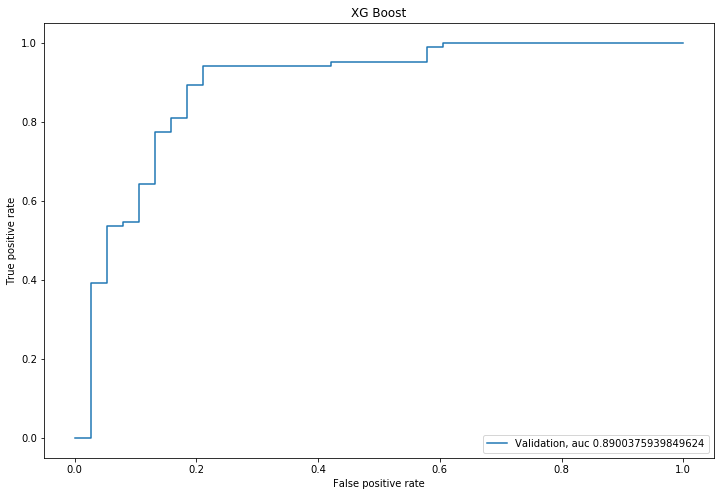

In [380]:
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation, auc "+str(auc))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc=4)
plt.title("XG Boost")
plt.show()

# Feature Engineering

In [173]:
train['Total Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total Income']=test['ApplicantIncome']+test['CoapplicantIncome']

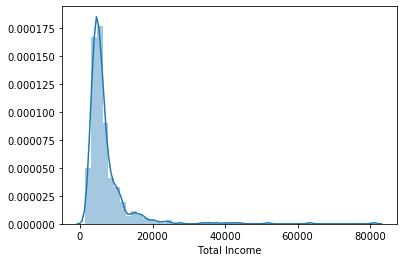

In [174]:
sns.distplot(train['Total Income'])

Right Skewed

In [175]:
train['Total Income Log']=np.log(train['Total Income'])
test['Total Income Log']=np.log(test['Total Income'])

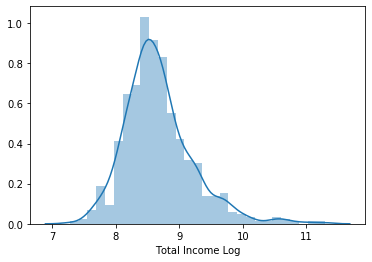

In [176]:
sns.distplot(train['Total Income Log'])

In [177]:
train=train.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)

In [178]:
test=test.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)

# Final model discussion

In [242]:
X=train.drop('Loan_Status',1)

In [243]:
Y=train.Loan_Status

In [270]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index ,test_index in kf.split(X,Y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=Y.iloc[train_index],Y.iloc[test_index]
    lr=LogisticRegression(random_state=1)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy score ',score)
    i+=1
    pred_test=lr.predict(test)
    pred=lr.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score  0.8130081300813008

2 of kfold 5
accuracy score  0.8048780487804879

3 of kfold 5
accuracy score  0.7560975609756098

4 of kfold 5
accuracy score  0.7723577235772358

5 of kfold 5
accuracy score  0.8032786885245902


In [381]:
import pickle

In [382]:
with open('loan_predict.pkl', 'wb') as file:
    pickle.dump(logreg, file)